# Nick Wan Data Science Bootcamp Day #3

The third day + notes for Nick Wan's Data Science bootcamp.

## Load in the Data and Initialize Packages

In [1]:
import pandas as pd

df = pd.read_csv('data/2023-nwbc-reds.csv')

# in today's example, we need to build off the dataframes from the previous day

df1 = df.loc[df['is_reds_pitcher']==1, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).mean()
df1.rename(columns={'is_strike':'avg'}, inplace=True)

df2 = df.loc[df['is_reds_pitcher']==1, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).count()
df2.rename(columns={'is_strike':'count'}, inplace=True)

df3 = df1.merge(df2, on=['pitcher_name', 'pitch_name'])

In [2]:
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,delta_run_exp,attack_zone,swing,batter_name,total_score,is_strike,is_2_strikes,is_high_velo,strike_in_heart,is_reds_pitcher
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,-0.083,heart,0,"garcia, aramis",17,0,1,0,0,0
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,0.014,shadow,0,"garcia, aramis",17,0,1,0,0,0
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,0.011,waste,0,"garcia, aramis",17,0,1,0,0,0
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,-0.023,heart,0,"garcia, aramis",17,1,0,0,1,0
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,-0.017,heart,0,"garcia, aramis",17,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49033,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",673357,668881,NaN,foul,...,NaN,waste,0,"robert, luis",0,1,0,0,0,1
49034,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",673357,668881,NaN,swinging_strike,...,NaN,waste,0,"robert, luis",0,1,0,0,0,1
49035,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",641313,668881,strikeout,foul_tip,...,NaN,waste,0,"anderson, tim",0,0,1,0,0,1
49036,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",641313,668881,NaN,called_strike,...,NaN,waste,0,"anderson, tim",0,1,0,0,0,1


In [3]:
df3

,pitcher_name,pitch_name,avg,count
0,"Anderson, Chase",4-Seam Fastball,0.437500,128
1,"Anderson, Chase",Changeup,0.542857,140
2,"Anderson, Chase",Curveball,0.368421,38
3,"Anderson, Chase",Cutter,0.438202,89
4,"Anderson, Chase",Sinker,0.464286,56
...,...,...,...,...
141,"Zeuch, T.J.",Slider,0.373134,67
142,"Zimmer, Kyle",4-Seam Fastball,0.400000,5
143,"Zimmer, Kyle",Changeup,1.000000,1
144,"Zimmer, Kyle",Curveball,1.000000,1


## Data Visualizations

Suppose you want to create a data visualization from Hunter Greene's counts and averages that we ended with on Day 2. We can create a data frame `df_plt` to store this data.

In [4]:
pitcher_name = 'Greene, Hunter'
df_plt = df3.loc[df3['pitcher_name'] == pitcher_name]
df_plt

,pitcher_name,pitch_name,avg,count
63,"Greene, Hunter",4-Seam Fastball,0.507614,1182
64,"Greene, Hunter",Changeup,0.279661,118
65,"Greene, Hunter",Slider,0.480000,900


In Python, the most common plotting packages are called `matplotlib` and `seaborn`. We can use it in Python by calling the following code:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

We can generate a bar plot using `seaborn` by using the `barplot()` function, specifying the data we want to use, the column to use for the x-axis and the column to use for the y-axis.

Additionally, if you want to display your graphs, you can use `plt.show()`.

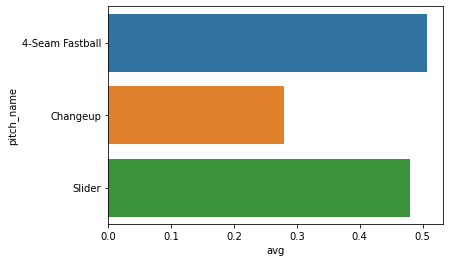

In [6]:
sns.barplot(data=df_plt, x='avg', y='pitch_name')
plt.show()

You can also render multiple graphs in the same cell, then at the very end just add `plt.show()`. Let's write a **for-loop** to make this possible so that we do not have to copy-paste every time:

Greene, Hunter


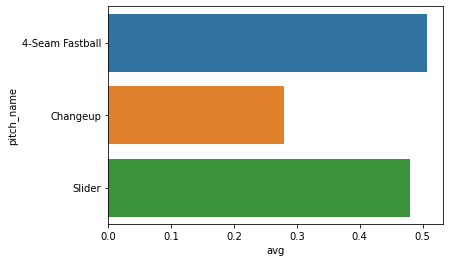

Lodolo, Nick


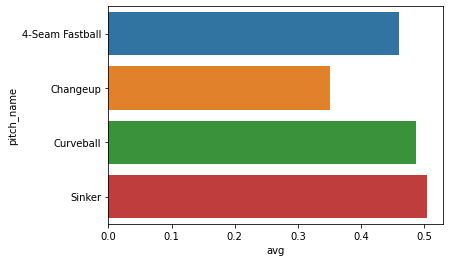

Ashcraft, Graham


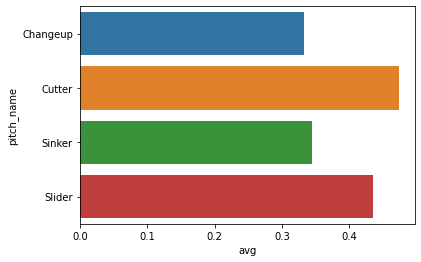

Cruz, Fernando


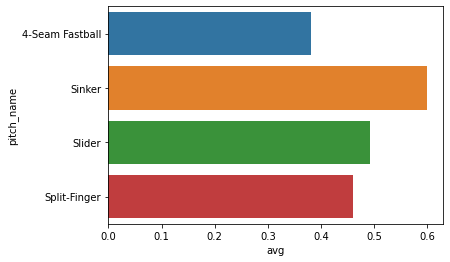

Gibaut, Ian


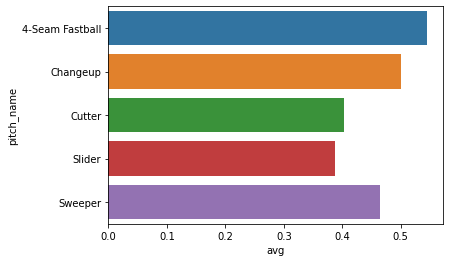

In [7]:
pitchers = ['Greene, Hunter', 'Lodolo, Nick', 'Ashcraft, Graham', 'Cruz, Fernando', 'Gibaut, Ian']

for pitcher in pitchers:
    print(pitcher)
    sns.barplot(data=df3.loc[df3['pitcher_name'] == pitcher], x='avg', y='pitch_name')
    plt.show()

What if we want a graph for every pitcher? Remember that `unique()` function from day 1? We can just use that in our for loop!

```python
for pitcher in df3['pitcher_name'].unique():
    print(pitcher)
    sns.barplot(data=df3.loc[df3['pitcher_name'] == pitcher], x='avg', y='pitch_name')
    plt.show()
```

## HOMEWORK

1. What is the average amount of strikes thrown in each `attack_zone`? Rename `attack_zone` to `Attack Zones`. 
> Note: This is overall, not specific for each pitcher

In [8]:
# CODE TO GO HERE
df_attack = df.loc[:, ['attack_zone', 'is_strike']].groupby(['attack_zone'], as_index=False).mean()
df_attack.rename(columns={'attack_zone':'Attack Zones'}, inplace=True)
df_attack

,Attack Zones,is_strike
0,chase,0.196261
1,heart,0.663051
2,shadow,0.551291
3,waste,0.134016


2. For each Reds pitcher, how many times did they throw into each `attack_zone` bewteen `release_speed` of 80 and 90? What were the average strikes in each `attack_zone` between 80 and 90 `release_speed`? Merge the number of times thrown into each attack zone and the average strikes in each attack zone for each pitcher into one dataframe.

In [9]:
df_pitchers_counts = df.loc[
    (df['is_reds_pitcher']==1) &
    (df['release_speed'].between(80,90)),
    ['pitcher_name', 'attack_zone', 'is_strike']
].groupby(['pitcher_name', 'attack_zone'], as_index=False).count()
df_pitchers_counts.rename(columns={'is_strike':'count'}, inplace=True)

df_pitchers_average = df.loc[
    (df['is_reds_pitcher']==1) &
    (df['release_speed'].between(80,90)),
    ['pitcher_name', 'attack_zone', 'is_strike']
].groupby(['pitcher_name', 'attack_zone'], as_index=False).mean()
df_pitchers_average.rename(columns={'is_strike':'avg'}, inplace=True)

df_pitcher_attack = df_pitchers_counts.merge(df_pitchers_average, on=['pitcher_name', 'attack_zone'])
df_pitcher_attack

,pitcher_name,attack_zone,count,avg
0,"Anderson, Chase",chase,70,0.214286
1,"Anderson, Chase",heart,42,0.785714
2,"Anderson, Chase",shadow,113,0.575221
3,"Anderson, Chase",waste,16,0.000000
4,"Ashcraft, Graham",chase,128,0.328125
...,...,...,...,...
142,"Zeuch, T.J.",heart,30,0.666667
143,"Zeuch, T.J.",shadow,49,0.408163
144,"Zeuch, T.J.",waste,15,0.000000
145,"Zimmer, Kyle",chase,2,1.000000


3. For each batter, what pitch types did they hit for home runs? For each pitcher, what is their most frequently thrown pitch type? Join batters and pitchers together. After joining check to see if the batter and the pitcher ever matched up against each other in this dataset -- make a new column that indicates if they did match up against each other or if they didn't.

In [10]:
df['is_home_run'] = 0
df.loc[df['events']=='home_run', 'is_home_run'] = 1

df_hr = df.loc[:, ['batter_name', 'pitch_name', 'is_home_run']].groupby(['batter_name', 'pitch_name'], as_index=False).count()
df_hr.rename(columns={'is_home_run':'home_run_count'}, inplace=True)

# getting this is a little bit complicated lol
df_fr = df.loc[:, ['pitcher_name', 'pitch_name', 'is_home_run']].groupby(['pitcher_name', 'pitch_name'], as_index=False).count()
_df_fr = df_fr.loc[:, ['pitcher_name', 'is_home_run']].groupby(['pitcher_name'], as_index=False).max()
df_fr = df_fr.merge(_df_fr)
df_fr.rename(columns={'is_home_run':'pitch_count'}, inplace=True)
df_fr.head()

df_q3 = df_hr.merge(df_fr, on=['pitch_name'])

_df_q3 = df.loc[:, ['pitcher_name', 'batter_name']].drop_duplicates()
_df_q3['real_matchup'] = 1

df_q3_final = df_q3.merge(_df_q3, how='left')
df_q3_final['real_matchup'] = df_q3_final['real_matchup'].fillna(0).astype(bool)
df_q3_final.head(50)

,batter_name,pitch_name,home_run_count,pitcher_name,pitch_count,real_matchup
0,"abrams, cj",4-Seam Fastball,46,"Adon, Joan",73,False
1,"abrams, cj",4-Seam Fastball,46,"Anderson, Ian",30,False
2,"abrams, cj",4-Seam Fastball,46,"Anderson, Tyler",47,False
3,"abrams, cj",4-Seam Fastball,46,"Baker, Bryan",11,False
4,"abrams, cj",4-Seam Fastball,46,"Bautista, Félix",13,False
5,"abrams, cj",4-Seam Fastball,46,"Bazardo, Eduard",4,False
6,"abrams, cj",4-Seam Fastball,46,"Bednar, David",47,False
7,"abrams, cj",4-Seam Fastball,46,"Beeks, Jalen",15,False
8,"abrams, cj",4-Seam Fastball,46,"Bickford, Phil",28,False
9,"abrams, cj",4-Seam Fastball,46,"Bieber, Shane",35,False


4. Make a bar plot for 5 players and plot the amount of times they have thrown each pitch type.

Greene, Hunter


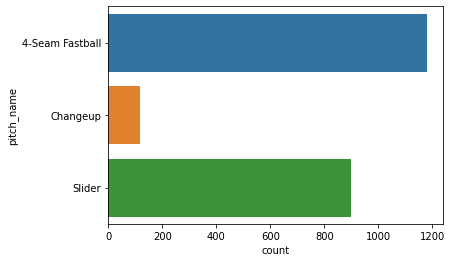

Lodolo, Nick


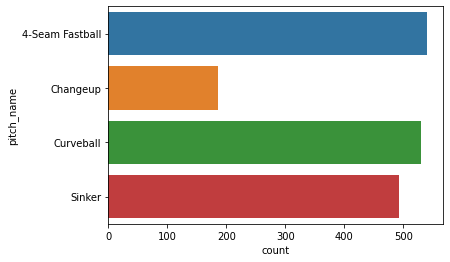

Ashcraft, Graham


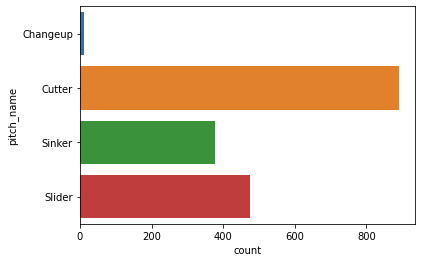

Cruz, Fernando


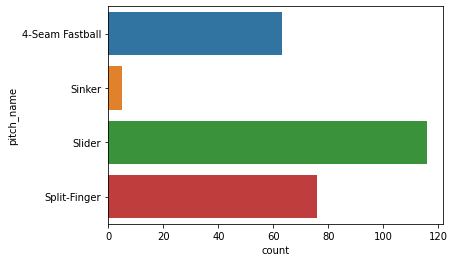

Gibaut, Ian


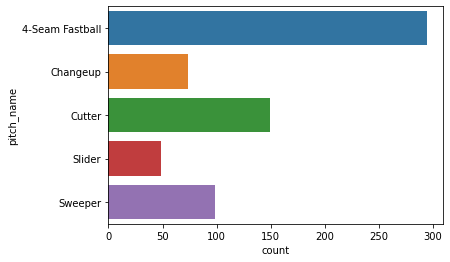

In [11]:
pitchers = ['Greene, Hunter', 'Lodolo, Nick', 'Ashcraft, Graham', 'Cruz, Fernando', 'Gibaut, Ian']

for pitcher in pitchers:
    print(pitcher)
    player_df = df.loc[df['pitcher_name']==pitcher, ['pitcher_name', 'pitch_name']].groupby(['pitch_name'], as_index=False).count()
    player_df.rename(columns={'pitcher_name':'count'}, inplace=True)
    sns.barplot(data=player_df, x='count', y='pitch_name')
    plt.show()

5. Use `sns.scatterplot()` and plot `avg` as the x-axis and `count` as the y-axis. You can use this with the entire dataset or use a subsample of data (i.e. if you only want to look at Hunter Greene, that would be a subsample of the dataset).

<Axes: xlabel='avg', ylabel='count'>

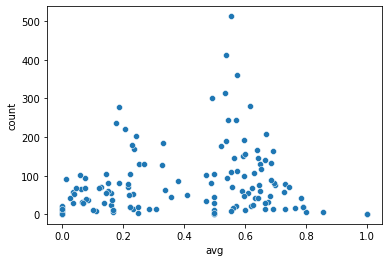

In [12]:
sns.scatterplot(data=df_pitcher_attack, x='avg', y='count')

**BONUS #1:** What's each Reds pitcher's best and worst pitch type?

> Hint: more strikes are "good: for the pitcher

In [13]:
# CODE TO GO HERE

**BONUS #2:** Using everything you know from the last 3 days, pitch a pitcher and describe their ability to throw strikes. You can use any columns for your analysis. Some columns that could be helpful: `pitch_name`, `attack_zone`, make a column for strikes, make a column before balls, make a column for different hit types in `events` (i.e. a home run or hit column), make a column for your favorite team, make a column for left handed pitcher VS right handed pitcheres (or left handed batters VS right handed batters). Pick a few interesting columns and describe a pitcher's strike rate. Visualize it if possible.

In [14]:
# CODE TO GO HERE

In [15]:
# write our work to a csv so we can use it later
df.to_csv('./data/2023-nwbc-reds.csv', index=False)